In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets,transforms
from torchvision.utils import make_grid

In [2]:
transforms=transforms.ToTensor()

In [3]:
train_data=datasets.MNIST(root='Balo',download=True,train=True,transform=transforms)

C:\Users\rohan\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Balo
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data=datasets.MNIST(root='Balo',download=True,train=False,transform=transforms)

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Balo
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)

In [8]:
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [34]:
class Convultutional_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*5*5)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [35]:
torch.manual_seed(42)
model=Convultutional_network()

In [36]:
model

Convultutional_network(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [37]:
criterion=nn.CrossEntropyLoss()

In [38]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [39]:
epochs=10
train_losses=[]
predictedp=[]

for i in range(epochs):
    batch_corr=0
    for b,(X_train,y_train) in enumerate(train_loader):
        y_val=model(X_train)
        loss=criterion(y_val,y_train)
        predicted=torch.max(y_val.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    predictedp.append(predicted)
    

In [40]:
with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
        y_val=model(X_test)
        losse=criterion(y_val,y_test)

In [41]:
losse

tensor(3.0040e-06)

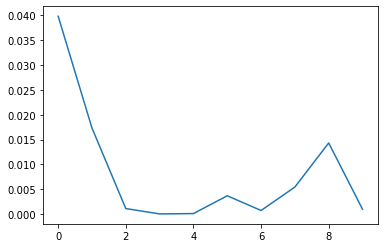

In [42]:
plt.plot(train_losses)

In [43]:
test_loader_all=DataLoader(test_data,batch_size=10000,shuffle=False)

In [45]:
with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader_all):
        io=model(X_test)
        lossees=criterion(io,y_test)

In [46]:
lossees

tensor(0.0624)

In [47]:
from sklearn.metrics import confusion_matrix